<a href="https://colab.research.google.com/github/jiyose12/machinelearning-IFPB/blob/master/projeto_tae_databaseMLP_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import metrics
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

url = "https://raw.githubusercontent.com/victorx9999/MachineLearning/master/data/tae.data"
 
# Carregar base de dados
dataset = pd.read_csv(url, header=None)
 
columns = len(dataset.columns)
 
y = dataset[0] # extrai a primeira coluna, que é o label
X = dataset.loc[:,1:columns]
print(X)
print(columns)
# Transforma para Array NumPy
X = np.array(X)
y = np.array(y)



      1   2  3   4  5
0    23   3  1  19  3
1    15   3  1  17  3
2    23   3  2  49  3
3     5   2  2  33  3
4     7  11  2  55  3
..   ..  .. ..  .. ..
146   3   2  2  26  1
147  10   3  2  12  1
148  18   7  2  48  1
149  22   1  2  51  1
150   2  10  2  27  1

[151 rows x 5 columns]
6


In [ ]:
from sklearn.model_selection import StratifiedKFold
from collections import Counter
folds = 10
 
kf = StratifiedKFold(n_splits = folds)
 
## 10 conjuntos de dados
X_train = []
y_train = []
 
X_test = []
y_test = []
 
for train_index, test_index in kf.split(X,y):
  
  X_train.append(X[train_index])
  X_test.append(X[test_index])
  
  y_train.append(y[train_index])
  y_test.append(y[test_index])

In [ ]:
wine_results = {
    'tree_entropy': [],
    'tree_gini': [],
    'knn5': [],
    'knn10': [],
    'mlp_tanh_51010': [],
    'mlp_relu_51010': [],
    'mlp_tanh_48': [],
    'mlp_relu_48': [],
    'kmeans': [],
} 

# Configuração do Kmeans
myset = set(y) # Cria um conjunto. Em conjuntos, dados não se repetem. Assim, esse conjunto conterá apenas um valor de cada
clusters = len(myset) # Quantos clusters teremos no KMeans
print(myset)
print(clusters)
for i in range(folds):
  # MLP TANH
  mlpTanhModel = MLPClassifier(hidden_layer_sizes=(5,10,10), activation='tanh', max_iter=3000, random_state=1)
  mlpTanhModel = mlpTanhModel.fit(X_train[i], y_train[i])
  mlpTanhResult = mlpTanhModel.predict(X_test[i])
  mlpTanhAcc = metrics.accuracy_score(mlpTanhResult, y_test[i])
  wine_results['mlp_tanh_51010'].append(round(mlpTanhAcc * 100))

  # MLP TANH 2.0
  mlpTanhModel2 = MLPClassifier(hidden_layer_sizes=(4,8), activation='tanh', max_iter=2000, random_state=1)
  mlpTanhModel2 = mlpTanhModel2.fit(X_train[i], y_train[i])
  mlpTanhResult2 = mlpTanhModel2.predict(X_test[i])
  mlpTanhAcc2 = metrics.accuracy_score(mlpTanhResult2, y_test[i])
  wine_results['mlp_tanh_48'].append(round(mlpTanhAcc2 * 100))

  # MLP RELU
  mlpReluModel = MLPClassifier(hidden_layer_sizes=(4,8), activation="relu", max_iter=3000, random_state=1)
  mlpReluModel = mlpReluModel.fit(X_train[i], y_train[i])
  mlpReluResult = mlpReluModel.predict(X_test[i])
  mlpReluAcc = metrics.accuracy_score(mlpReluResult, y_test[i])
  wine_results['mlp_relu_51010'].append(round(mlpReluAcc * 100))

  #MLP RELU 2.0  
  mlpReluModel2 = MLPClassifier(hidden_layer_sizes=(5,10,10), activation="relu", max_iter=3000, random_state=1)
  mlpReluModel2 = mlpReluModel2.fit(X_train[i], y_train[i])
  mlpReluResult2 = mlpReluModel2.predict(X_test[i])
  mlpReluAcc2 = metrics.accuracy_score(mlpReluResult2, y_test[i])
  wine_results['mlp_relu_48'].append(round(mlpReluAcc2 * 100))

  # ARVORE ENTROPY
  arvoreEntropyModel = tree.DecisionTreeClassifier(criterion="entropy")
  arvoreEntropyModel = arvoreEntropyModel.fit(X_train[i], y_train[i])
  arvoreEntropyresult = arvoreEntropyModel.predict(X_test[i])
  arvoreEntropyacc = metrics.accuracy_score(arvoreEntropyresult, y_test[i])
  wine_results['tree_entropy'].append(round(arvoreEntropyacc * 100))
 
  # ARVORE GINI
  arvoreGiniModel = tree.DecisionTreeClassifier(criterion="gini")
  arvoreGiniModel = arvoreGiniModel.fit(X_train[i], y_train[i])
  arvoreGiniresult = arvoreGiniModel.predict(X_test[i])
  arvoreGiniacc = metrics.accuracy_score(arvoreGiniresult, y_test[i])
  wine_results['tree_gini'].append(round(arvoreGiniacc * 100))

  # KNN 5
  knn5model = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='brute')
  knn5model = knn5model.fit(X_train[i], y_train[i])
  result_knn5 = knn5model.predict(X_test[i])
  knn5acc = metrics.accuracy_score(result_knn5, y_test[i])
  wine_results['knn5'].append(round(knn5acc * 100))

  # KNN 10
  knn10model = KNeighborsClassifier(n_neighbors=10, metric='manhattan', algorithm='brute')
  knn10model = knn10model.fit(X_train[i], y_train[i])
  result_knn10 = knn10model.predict(X_test[i])
  knn10acc = metrics.accuracy_score(result_knn10, y_test[i])
  wine_results['knn10'].append(round(knn10acc * 100))
  
  # KMEANS
  model = KMeans(n_clusters = clusters)
  model = model.fit(X_train[i])
  # Pegar os labels dos padrões de Treinamento
  labels = model.labels_

  map_labels = []

  for a in range(clusters):
    map_labels.append([])

  new_y_train = y_train[i]

  for b in range(len(y_train[i])):
    for c in range(clusters):
      if labels[b] == c:
        map_labels[c].append(new_y_train[b])
  # print(map_labels)
  # Criar dicionário com os labells a serem mapeados
  mapping = {}

  for d in range(clusters):
    final = Counter(map_labels[d]) # contar a classe que mais aparece
    value = final.most_common(1)[0][0] # retorna a classe com maior frequência
    mapping[d] = value
  # print(mapping)
  result = model.predict(X_test[i])
  result = [mapping[j] for j in result]

  acc = metrics.accuracy_score(result, y_test[i])
  wine_results['kmeans'].append(round(acc * 100))


{1, 2}
2


MLP Relu 5,10,10
MLP Relu 5,10


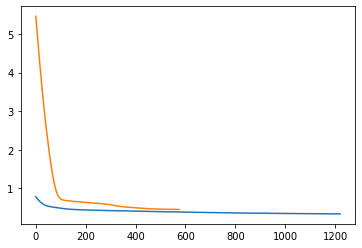

In [ ]:
# Gráfico de Perdas MLPs
import matplotlib.pyplot as plt

# print("MLP Tahn 5,10,10")
# mlpTanhModel = MLPClassifier(hidden_layer_sizes=(5,10,10), activation='tanh', max_iter=3000, random_state=1)
# mlpTanhModel = mlpTanhModel.fit(X_train[0], y_train[0])
# plt.plot(mlpTanhModel.loss_curve_)
print("MLP Relu 5,10,10")
mlpReluModel = MLPClassifier(hidden_layer_sizes=(5,10,10), activation='relu', max_iter=3000, random_state=1)
mlpReluModel = mlpReluModel.fit(X_train[0], y_train[0])
plt.plot(mlpReluModel.loss_curve_)
# print("MLP Tahn 5,10")
# mlpTanhModel2 = MLPClassifier(hidden_layer_sizes=(5,10), activation='tanh', max_iter=3000, random_state=1)
# mlpTanhModel2 = mlpTanhModel2.fit(X_train[0], y_train[0])
# plt.plot(mlpTanhModel2.loss_curve_)
print("MLP Relu 5,10")
mlpReluModel2 = MLPClassifier(hidden_layer_sizes=(5,10), activation='relu', max_iter=3000, random_state=1)
mlpReluModel2 = mlpReluModel2.fit(X_train[0], y_train[0])
plt.plot(mlpReluModel2.loss_curve_)

In [ ]:
print('MLP TANH (5,10,10)')
print(round(np.mean(wine_results['mlp_tanh_51010'])))
print('MLP RELU (5,10,10)')
print(round(np.mean(wine_results['mlp_relu_51010'])))
print("MLP TANH (4,8)")
print(round(np.mean(wine_results['mlp_tanh_48'])))
print("MLP RELU (4,8)")
print(round(np.mean(wine_results['mlp_relu_48'])))
print("ARVORE GINI")
print(round(np.mean(wine_results['tree_gini'])))
print("ARVORE ENTROPY")
print(round(np.mean(wine_results['tree_entropy'])))
print("KNN 5")
print(round(np.mean(wine_results['knn5'])))
print("KNN 10")
print(round(np.mean(wine_results['knn10'])))
print("KMeans")
print(round(np.mean(wine_results['kmeans'])))


MLP TANH (5,10,10)
81.0
MLP RELU (5,10,10)
81.0
MLP TANH (4,8)
81.0
MLP RELU (4,8)
79.0
ARVORE GINI
82.0
ARVORE ENTROPY
82.0
KNN 5
75.0
KNN 10
79.0
KMeans
81.0


In [ ]:
pd.DataFrame.from_dict(wine_results, orient='index')

,0,1,2,3,4,5,6,7,8,9
tree_entropy,100.0,100.0,100.0,87.0,93.0,67.0,73.0,80.0,47.0,73.0
tree_gini,100.0,100.0,100.0,87.0,93.0,67.0,73.0,80.0,47.0,73.0
knn5,81.0,80.0,87.0,73.0,80.0,67.0,73.0,73.0,67.0,73.0
knn10,88.0,80.0,80.0,80.0,80.0,80.0,73.0,73.0,80.0,80.0
mlp_tanh_51010,81.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,87.0
mlp_relu_51010,81.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,87.0
mlp_tanh_48,81.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,87.0
mlp_relu_48,88.0,87.0,87.0,87.0,80.0,73.0,73.0,87.0,53.0,73.0
kmeans,81.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,87.0
